In [1]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../input/BES/stratbr_grid_v4/gempy_format/"

Setting Backend To: AvailableBackends.numpy


## Step by step

In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="BES_Workflow_v1.0.0",
    extent=[0.0, 179000.0, 0.0, 148000.0, -20000, 500],
    resolution=[50, 50, 50],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "orientations_points.csv",
        path_to_surface_points=data_path + "surfaces_points_scaled_merged_topo_all_ages_X_and_Y_reduced_Z_ajusted.csv",
    ),
)

In [3]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=bes_100,
	color=#015482,
	is_active=True
),
Element(
	name=bes_89,
	color=#9f0052,
	is_active=True
),
Element(
	name=bes_90,
	color=#ffbe00,
	is_active=True
),
Element(
	name=bes_91,
	color=#728f02,
	is_active=True
),
Element(
	name=bes_92,
	color=#443988,
	is_active=True
),
Element(
	name=bes_93,
	color=#ff3f20,
	is_active=True
),
Element(
	name=bes_94,
	color=#5DA629,
	is_active=True
),
Element(
	name=bes_95,
	color=#b271d0,
	is_active=True
),
Element(
	name=bes_96,
	color=#72e54a,
	is_active=True
),
Element(
	name=bes_97,
	color=#583bd1,
	is_active=True
),
Element(
	name=bes_98,
	color=#d0e63d,
	is_active=True
),
Element(
	name=bes_99,
	color=#b949e2,
	is_active=True
),
Element(
	name=topo,
	color=#95ce4b,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [4]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series": (
            'topo',
            'bes_89',
            'bes_90',
            'bes_91',
            'bes_92',
            'bes_93',
            'bes_94',
            'bes_95',
            'bes_96',
            'bes_97',
            'bes_98',
            'bes_99',
            'bes_100')
    }
)

geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=topo,
	color=#95ce4b,
	is_active=True
),
Element(
	name=bes_89,
	color=#9f0052,
	is_active=True
),
Element(
	name=bes_90,
	color=#ffbe00,
	is_active=True
),
Element(
	name=bes_91,
	color=#728f02,
	is_active=True
),
Element(
	name=bes_92,
	color=#443988,
	is_active=True
),
Element(
	name=bes_93,
	color=#ff3f20,
	is_active=True
),
Element(
	name=bes_94,
	color=#5DA629,
	is_active=True
),
Element(
	name=bes_95,
	color=#b271d0,
	is_active=True
),
Element(
	name=bes_96,
	color=#72e54a,
	is_active=True
),
Element(
	name=bes_97,
	color=#583bd1,
	is_active=True
),
Element(
	name=bes_98,
	color=#d0e63d,
	is_active=True
),
Element(
	name=bes_99,
	color=#b949e2,
	is_active=True
),
Element(
	name=bes_100,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [5]:
geo_model.grid

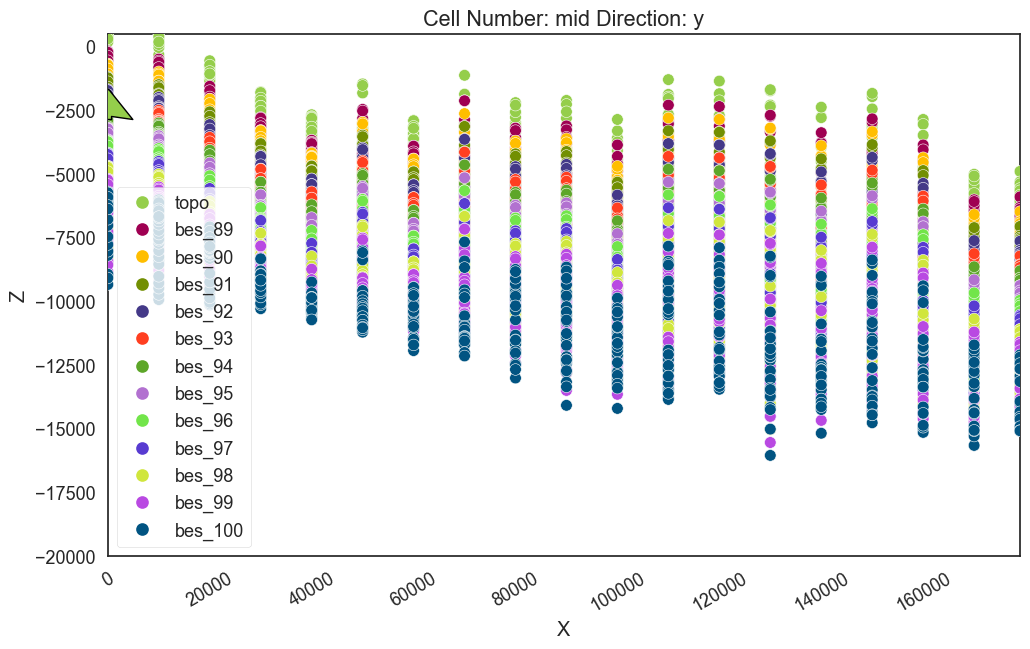

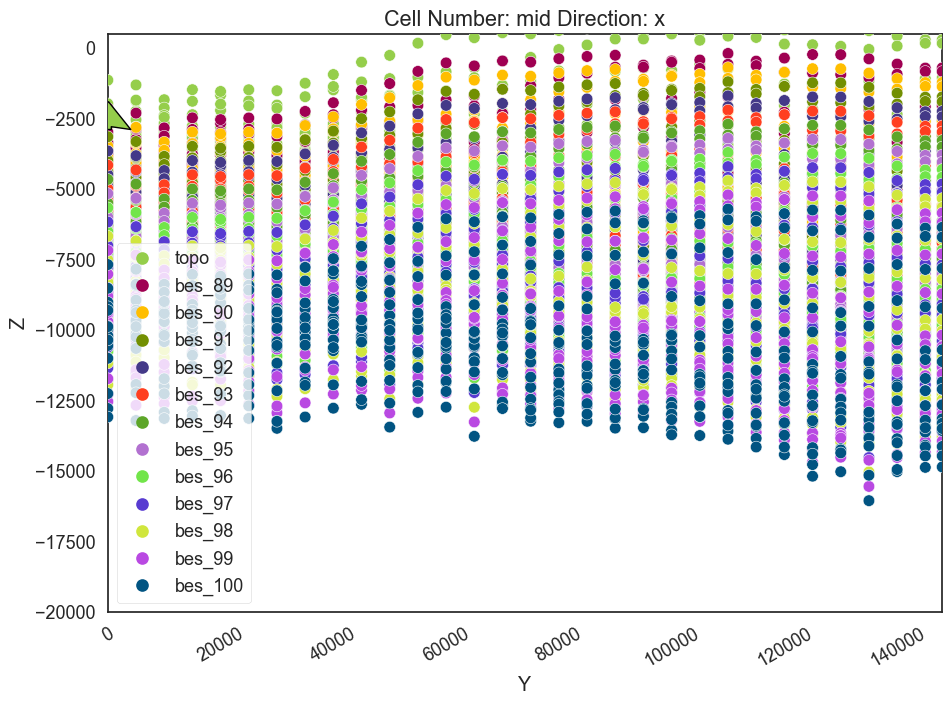

In [6]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

In [7]:
gpv.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=False,
    ve=2,
)

In [8]:
bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]

# Calculate midpoints
mid_x = (bounds[0] + bounds[1]) / 2
mid_y = (bounds[2] + bounds[3]) / 2

# Set section grid
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])
    }
)

Active grids: ['sections']


,start,stop,resolution,dist
section1,"[0.0, 74000.0]","[179000.0, 74000.0]","[200, 150]",179000.0


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

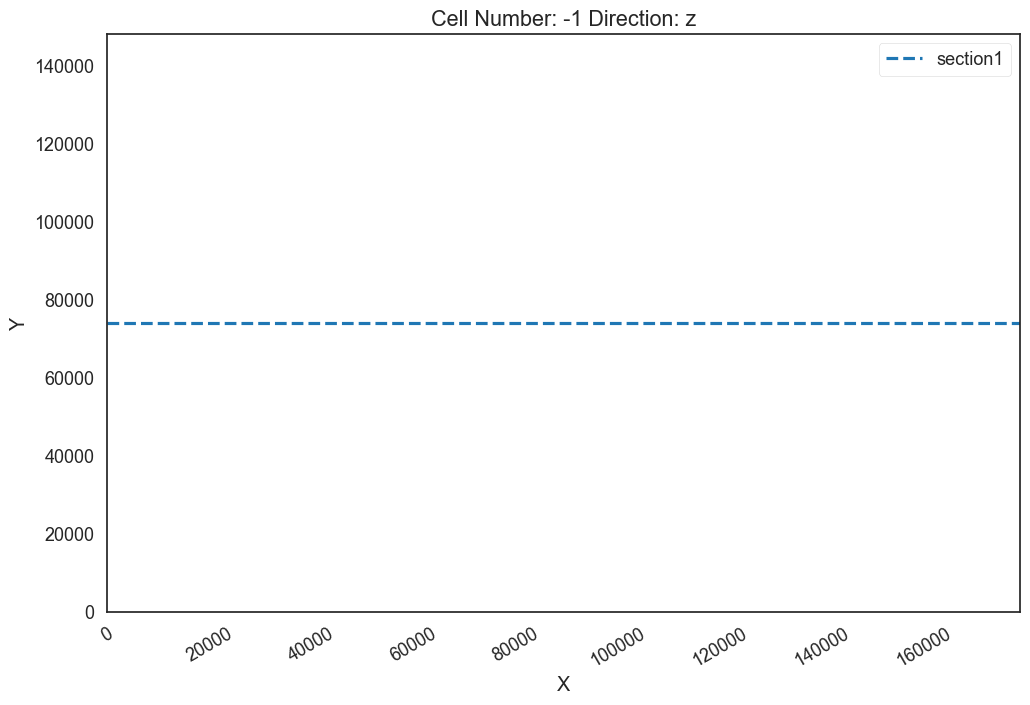

In [9]:
gpv.plot_section_traces(geo_model)

In [10]:
bes_series = geo_model.structural_frame.get_group_by_name("Strat_Series")

In [11]:
gp.modify_surface_points(
    geo_model=geo_model,
    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],
    nugget=0.01
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=topo,
	color=#95ce4b,
	is_active=True
),
Element(
	name=bes_89,
	color=#9f0052,
	is_active=True
),
Element(
	name=bes_90,
	color=#ffbe00,
	is_active=True
),
Element(
	name=bes_91,
	color=#728f02,
	is_active=True
),
Element(
	name=bes_92,
	color=#443988,
	is_active=True
),
Element(
	name=bes_93,
	color=#ff3f20,
	is_active=True
),
Element(
	name=bes_94,
	color=#5DA629,
	is_active=True
),
Element(
	name=bes_95,
	color=#b271d0,
	is_active=True
),
Element(
	name=bes_96,
	color=#72e54a,
	is_active=True
),
Element(
	name=bes_97,
	color=#583bd1,
	is_active=True
),
Element(
	name=bes_98,
	color=#d0e63d,
	is_active=True
),
Element(
	name=bes_99,
	color=#b949e2,
	is_active=True
),
Element(
	name=bes_100,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [12]:
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 5, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000001E4A876F760>, derivative_div_r=<function cubic_function_p_div_r at 0x000001E4A876FB50>, second_derivative=<function cubic_function_a at 0x000001E4A876FBE0>, consume_sq_distance=False)>, 'compute_condition_number': False, 'kernel_solver': <Solvers.DEFAULT: 1>}, number_octree_levels=1, current_octree_level=0, compute_scalar_gradient=False, mesh_extraction=True, mesh_extraction_masking_options=MeshExtractionMaskingOptions.INTERSECT, mesh_extraction_fancy=True, debug=True, debug_water_tight=False, sigmoid_slope=50000, _number_octree_levels_surface=4)

In [20]:
geo_model.interpolation_options.number_octree_levels = 5
geo_model.interpolation_options.number_octree_levels_surface = 4
geo_model.interpolation_options.kernel_options.range = .8

In [13]:
print(geo_model.structural_frame)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=topo,
	color=#95ce4b,
	is_active=True
),
Element(
	name=bes_89,
	color=#9f0052,
	is_active=True
),
Element(
	name=bes_90,
	color=#ffbe00,
	is_active=True
),
Element(
	name=bes_91,
	color=#728f02,
	is_active=True
),
Element(
	name=bes_92,
	color=#443988,
	is_active=True
),
Element(
	name=bes_93,
	color=#ff3f20,
	is_active=True
),
Element(
	name=bes_94,
	color=#5DA629,
	is_active=True
),
Element(
	name=bes_95,
	color=#b271d0,
	is_active=True
),
Element(
	name=bes_96,
	color=#72e54a,
	is_active=True
),
Element(
	name=bes_97,
	color=#583bd1,
	is_active=True
),
Element(
	name=bes_98,
	color=#d0e63d,
	is_active=True
),
Element(
	name=bes_99,
	color=#b949e2,
	is_active=True
),
Element(
	name=bes_100,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],



In [14]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(backend=gp.data.AvailableBackends.PYTORCH)
    )

Setting Backend To: AvailableBackends.PYTORCH
Condition number: 95423859.47744189.


RuntimeError: [enforce fail at alloc_cpu.cpp:80] data. DefaultCPUAllocator: not enough memory: you tried to allocate 29863825200 bytes.

In [23]:
"""model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        use_gpu=True,
        dtype="float64"
    ))"""

Setting Backend To: AvailableBackends.numpy


MemoryError: Unable to allocate 2.15 GiB for an array with shape (7650, 37665) and data type float64

In [ ]:
gpv.plot_2d(geo_model, show_topography=False, section_names=['meio'], show_lith=True)

In [ ]:
gpv.plot_2d(geo_model, cell_number=[4], direction=['y'], show_topography=True, show_data=True)
gpv.plot_2d(geo_model, cell_number=[-4], direction=['y'], show_topography=True, show_data=True)

In [ ]:
gpv.plot_3d(geo_model, show_lith=True, show_topography=False, kwargs_plot_structured_grid={'opacity': 0.8})